<a href="https://colab.research.google.com/github/syh0397/User_analysis_elec/blob/main/1.%20EDA_%26_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT & Data Load

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#한글 나눔 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [57]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
#
import scipy.stats as stats
#
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [58]:
df = pd.read_csv('/content/drive/MyDrive/data/Electronics store/events 2.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ


#### 데이터 설명 

- 

In [59]:
columns = df.columns
print(columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


- 'event_time', - Event 가 발생한 시간입니다.
- 'event_type', - 사용자의 행동인 view, cart, remove_from_cart, purchase 가 담겨있는 컬럼입니다. 
- 'product_id', - 제품 ID 입니다.
- 'category_id', - 각 제품의 범주 id 입니다. 
- 'category_code', - 각 제품이 해당하는 범주 이름입니다.
- 'brand',  - 각 제품의 브랜드 입니다.
- 'price',  - 제품 가격입니다. (같은 제품이라도 계속 변화합니다.)
- 'user_id', - User들의 고유한 id 입니다.
- 'user_session' - 유저들의 세션을 나타냅니다.

## EDA

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [61]:
print("전체 user_id count : " ,len(df.user_id))
print("중복되지 않는 user_id count : ", len(df.user_id.unique()))
dup_user_id = df.duplicated(['user_id']).value_counts()
print('\n')
print("전체 세션 count : ", len(df.user_session))
print("중복되지 않는 세션 count : ", len(df.user_session.unique()))
print('\n')
dup = df.duplicated(['user_session']).value_counts()
print(dup)

전체 user_id count :  885129
중복되지 않는 user_id count :  407283


전체 세션 count :  885129
중복되지 않는 세션 count :  490399


False    490399
True     394730
dtype: int64


In [62]:
df.describe([0.01, 0.05, 0.10, 0.20,0.50, 0.80, 0.90, 0.95, 0.99])[["price"]]

,price
count,885129.0000
mean,146.3287
std,296.8077
min,0.2200
1%,5.7500
5%,10.8700
10%,14.0800
20%,21.3300
50%,65.7100
80%,226.8400


In [63]:
df.shape

(885129, 9)

In [64]:
# 분포(사분위, 평균, 표준편차, 최대 , 최소)를 확인
df.describe()

,product_id,category_id,price,user_id
count,885129.0000,885129.0000,885129.0000,885129.0000
mean,1906620.5359,2144422967992886784.0000,146.3287,1515915625547091200.0000
std,1458708.0993,616510516083801.2500,296.8077,37472865.5713
min,102.0000,2144415921001725952.0000,0.2200,1515915625353227008.0000
25%,698803.0000,2144415922528452608.0000,26.4600,1515915625533004288.0000
50%,1452883.0000,2144415925011480832.0000,65.7100,1515915625554085376.0000
75%,3721194.0000,2144415927519674624.0000,190.4900,1515915625594517504.0000
max,4183880.0000,2227847332769039360.0000,64771.0600,1515915625611024128.0000


#### 'Price' 컬럼 확인
- Price 값의 분포가 많이 차이납니다. 
- price 의 분포를 시각화 합니다.

max :  64771.06 mean : 146.32871349820806 median : 65.71


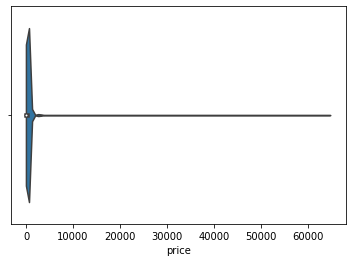

In [65]:
# price violine plot

price_vio = sns.violinplot(df['price'])
print("max : " , df['price'].max(),
      "mean :"  , df['price'].mean(),
      "median :"  , df['price'].median())
price_vio; 

In [66]:
pr_quantile  = df['price'].quantile(0.99)
print(pr_quantile)

pr_qu_aft = df[(df.price >= pr_quantile)]
print(pr_qu_aft.shape)
pr_qu_aft.head()

889.98
(8877, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
277,2020-09-24 12:58:46 UTC,view,1414369,2144415927049912542,electronics.video.tv,samsung,1983.8300,1515915625519411326,lZh5dBAAyT
302,2020-09-24 13:06:51 UTC,view,1027836,2144415922285183076,electronics.camera.video,sony,2138.9200,1515915625518971679,9qM6sla8Yx
391,2020-09-24 13:26:59 UTC,view,1148993,2144415922402623591,computers.peripherals.monitor,asus,1057.3500,1515915625399431063,qI2ILCw35i
392,2020-09-24 13:27:01 UTC,view,1148993,2144415922402623591,computers.peripherals.monitor,asus,1057.3500,1515915625399431063,OFVAuTUNOl
601,2020-09-24 14:08:50 UTC,view,474437,2144415924784988326,NaN,sony,1531.1400,1515915625519436934,QHSuenP1Ie


- event_time - object
- user_session - object

In [67]:
# 추가로 최소시간 최대시간 체크 , 
print("Min event_time:",min(df['event_time']))
print("Max event_time:",max(df['event_time']))

Min event_time: 2020-09-24 11:57:06 UTC
Max event_time: 2021-02-28 23:59:09 UTC


- 약 5개월 가량의 데이터입니다. 
- 9월 말 (가을) 2월 말 (겨울) 까지의 데이터가 들어 있습니다. 

#### 결측치 체크

In [68]:
# 결측치 체크
df.isnull().sum().to_frame('nan_count')

,nan_count
event_time,0
event_type,0
product_id,0
category_id,0
category_code,236219
brand,212364
price,0
user_id,0
user_session,165


category_code 와 brand 에 결측치가 있습니다.

#### 컬럼별로 고유 갯수 살펴보기

In [69]:
# 컬럼별로 고유 갯수 살펴보기 

for column_name in df:
  x = df[column_name].value_counts(ascending = False)
  print(column_name)
  print('\n')
  print(x.head(10))

event_time


2021-02-04 21:48:32 UTC    18
2021-02-07 02:17:44 UTC    11
2021-02-14 14:27:51 UTC    11
2021-02-07 02:35:14 UTC    11
2021-02-12 14:54:44 UTC    10
2021-01-29 03:12:30 UTC    10
2020-12-19 22:05:25 UTC    10
2021-02-26 05:11:26 UTC     9
2020-11-12 09:28:15 UTC     9
2021-02-23 13:30:24 UTC     9
Name: event_time, dtype: int64
event_type


view        793748
cart         54035
purchase     37346
Name: event_type, dtype: int64
product_id


1821813    14563
4099645     7089
3791351     6907
3829355     5762
1785245     5118
809948      4290
1830099     4201
893196      3912
4154414     3711
3791509     3616
Name: product_id, dtype: int64
category_id


2144415922427789416    116717
2144415925011480748     38206
2144415922528452715     36528
2144415924491387038     26604
2144415923107266682     25722
2144415926966026460     24773
2144415925196030129     23503
2144415921169498184     20775
2144415927049912542     19806
2144415923207929981     15430
Name: category_id, dtype: i

- 카테고리를 분할할 필요가 있습니다.
    - 3개로 나누어 새로운 컬럼을 생성해야함




---

event_type을 시각화 해봅니다

view       0.8968
cart       0.0610
purchase   0.0422
Name: event_type, dtype: float64


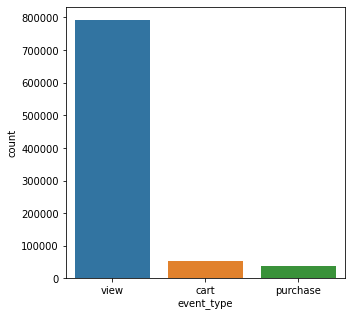

In [70]:
# event_type 컬럼 특성 확인 
plt.figure(figsize=(5,5))
sns.countplot(df.event_type)
plt.xlabel('event_type');
print(df['event_type'].value_counts(normalize=True))

1821813    14563
4099645     7089
3791351     6907
3829355     5762
1785245     5118
809948      4290
1830099     4201
893196      3912
4154414     3711
3791509     3616
4102739     3395
136700      2890
3828501     2809
287525      2799
4079420     2786
4079061     2704
3642540     2458
523117      2409
4078916     2049
4099764     2049
246841      1964
799067      1912
1843522     1905
3977213     1808
4183863     1795
137302      1701
4183872     1691
3964980     1682
1301733     1679
3560298     1647
Name: product_id, dtype: int64


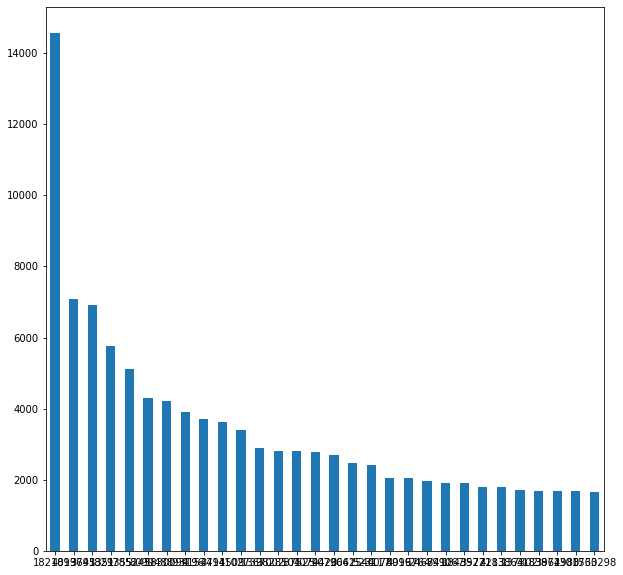

In [71]:
# product_id 의 숫자 내림차순 

df_pid_cnt = df['product_id'].value_counts(ascending = False)
print(df_pid_cnt.head(30))

plt.figure(figsize=(10,10))
df_pid_cnt[:30].plot(kind='bar', rot=0)

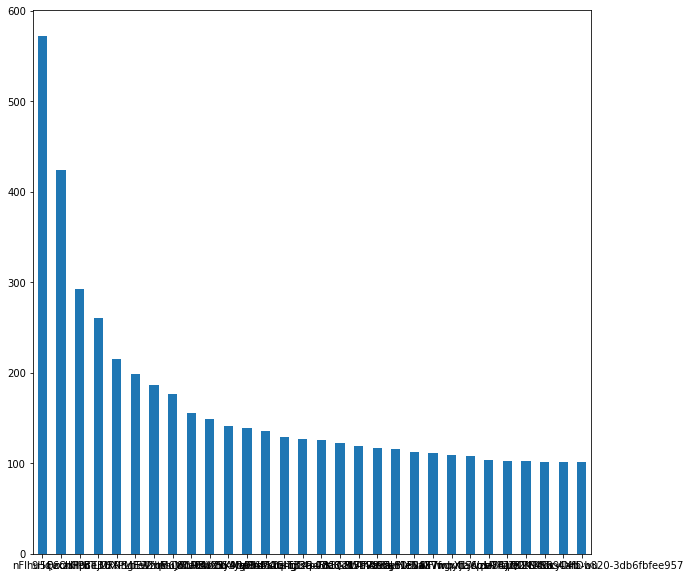

In [72]:
# 세션에 대한 정의도 해야하므로 session 컬럼도 시각화 해보겠습니다.
plt.figure(figsize=(10,10))
df['user_session'].value_counts(ascending = False)[:30].plot(kind='bar', rot=0)

## Pre-processing

#### 결측치 처리

In [73]:
Nan_sample = df.loc[df['category_code'].isna()].reset_index()
print(Nan_sample.shape)
Nan_sample.head()

(236219, 10)


,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy
1,4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ
2,8,2020-09-24 11:58:25 UTC,view,657859,2144415939431498289,NaN,NaN,34.1700,1515915625519320570,HEl15U7JVy
3,10,2020-09-24 11:58:34 UTC,view,811491,2144415926370435276,NaN,ritmix,33.3200,1515915625356205647,aFLc6y9kn4
4,11,2020-09-24 11:58:54 UTC,view,811491,2144415926370435276,NaN,ritmix,33.3200,1515915625356205647,aFLc6y9kn4


- 결측치는 따로 규칙성이 없습니다.
- 또한 236219개나 됩니다. 삭제하면 전체 데이터가 왜곡될 위험이 있습니다.

#### 시간을 알맞은 데이터 타입으로 변경해줍니다. 
- UTC를 없애고 
- date 와 Time으로 나누어 줍니다.

In [74]:
df.replace({'event_time': {'UTC':""}}, regex = True, inplace = True)
df['date'] = df.event_time.str.split(' ').str[0]
df['time'] = df.event_time.str.split(' ').str[1]
#나중에 타입은 변경해줍니다.  df['event_time'] = pd.to_datetime(df['event_time'], format="%Y/%m/%d %H:%M:%S")

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26
2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36


#### category_code를 세분화 시킵니다.

In [75]:
df['main_category'] = df.category_code.str.split('.').str[0]
df['mdi_category'] = df.category_code.str.split('.').str[1]
df['sub_category'] = df.category_code.str.split('.').str[2]

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler
2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN


## 세션에 대한 정의

세션은 코호트랑 다른 개념입니다. 

- 만약 제가 coupang page에 들어가본다고 가정합니다. 들어가서 어떤 페이지에도 들어가고, 클릭도 해보고 이런저런 활동을 했습니다. 그리고 **1 시간 정도 점심 먹고** 나서 또 coupang page 에 들어가서 어떠한 행동을 했다고 하면, 그 두개의 **행동 덩어리를 각각 묶으면** 분석에 활용할 수 있습니다. 

- 사람들이 한 번 들어왔을 때 어떤 행동들을 연속적으로 하는지, 어떤 계기로 앱을 종료했는지 같은 개념이 세션입니다.


#### 세션 살펴보기


---

- 세션에 대해서 정의해야 하므로 572개가 나온 'nFlhu5QzOd'값을 보도록 하겠습니다.
- 또한 시각화도 진행해보도록 하겠습니다.


In [76]:
nFlhu5QzOd = df['user_session'] == 'nFlhu5QzOd'
df_nFlhu5QzOd = df[nFlhu5QzOd]

print(df_nFlhu5QzOd.shape)
df_nFlhu5QzOd.head()

(572, 14)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category
410322,2020-12-08 06:13:31,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:31,appliances,environment,vacuum
410323,2020-12-08 06:13:38,view,3979025,2144415923744800906,appliances.environment.vacuum,bosch,350.6000,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:38,appliances,environment,vacuum
410324,2020-12-08 06:13:45,view,3978887,2144415923744800906,appliances.environment.vacuum,bosch,369.1700,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:45,appliances,environment,vacuum
410394,2020-12-08 06:36:13,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-08,06:36:13,appliances,environment,vacuum
410395,2020-12-08 06:36:27,view,669304,2144415923744800906,appliances.environment.vacuum,thomas,478.5900,1515915625554995474,nFlhu5QzOd,2020-12-08,06:36:27,appliances,environment,vacuum


In [77]:
print('category_code',df_nFlhu5QzOd.category_code.unique(),'\n',
      'user_id unique 값 ',df_nFlhu5QzOd.user_id.unique(),'\n',
      'event_type.unique',df_nFlhu5QzOd.event_type.unique() ,'\n',
      'product_id.unique 갯수',len(df_nFlhu5QzOd.product_id.unique()),'\n',
      'brand.unique',df_nFlhu5QzOd.brand.unique(),'\n',
      'price.unique',df_nFlhu5QzOd.price.unique(),'\n',
      'price.unique 갯수 ',len(df_nFlhu5QzOd.price.unique()))

category_code ['appliances.environment.vacuum'] 
 user_id unique 값  [1515915625554995474] 
 event_type.unique ['view'] 
 product_id.unique 갯수 9 
 brand.unique ['bosch' 'thomas'] 
 price.unique [297.19 350.6  369.17 365.25 478.59 575.73 120.   167.62 262.48] 
 price.unique 갯수  9


In [78]:
df_nFlhu5QzOd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 410322 to 825703
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     572 non-null    object 
 1   event_type     572 non-null    object 
 2   product_id     572 non-null    int64  
 3   category_id    572 non-null    int64  
 4   category_code  572 non-null    object 
 5   brand          572 non-null    object 
 6   price          572 non-null    float64
 7   user_id        572 non-null    int64  
 8   user_session   572 non-null    object 
 9   date           572 non-null    object 
 10  time          572 non-null    object 
 11  main_category  572 non-null    object 
 12  mdi_category   572 non-null    object 
 13  sub_category   572 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 67.0+ KB


In [79]:
temp = df_nFlhu5QzOd.copy()
temp['date_'] = pd.to_datetime(temp.event_time, format="%Y/%m/%d %H:%M:%S")
temp['diff'] = temp.date_.diff().fillna('NaT')

In [80]:
temp

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
410322,2020-12-08 06:13:31,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:31,appliances,environment,vacuum,2020-12-08 06:13:31,NaT
410323,2020-12-08 06:13:38,view,3979025,2144415923744800906,appliances.environment.vacuum,bosch,350.6000,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:38,appliances,environment,vacuum,2020-12-08 06:13:38,0 days 00:00:07
410324,2020-12-08 06:13:45,view,3978887,2144415923744800906,appliances.environment.vacuum,bosch,369.1700,1515915625554995474,nFlhu5QzOd,2020-12-08,06:13:45,appliances,environment,vacuum,2020-12-08 06:13:45,0 days 00:00:07
410394,2020-12-08 06:36:13,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-08,06:36:13,appliances,environment,vacuum,2020-12-08 06:36:13,0 days 00:22:28
410395,2020-12-08 06:36:27,view,669304,2144415923744800906,appliances.environment.vacuum,thomas,478.5900,1515915625554995474,nFlhu5QzOd,2020-12-08,06:36:27,appliances,environment,vacuum,2020-12-08 06:36:27,0 days 00:00:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825626,2021-02-18 07:48:51,view,247085,2144415923744800906,appliances.environment.vacuum,thomas,262.4800,1515915625554995474,nFlhu5QzOd,2021-02-18,07:48:51,appliances,environment,vacuum,2021-02-18 07:48:51,0 days 00:00:06
825699,2021-02-18 07:59:38,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2021-02-18,07:59:38,appliances,environment,vacuum,2021-02-18 07:59:38,0 days 00:10:47
825700,2021-02-18 07:59:43,view,847412,2144415923744800906,appliances.environment.vacuum,thomas,120.0000,1515915625554995474,nFlhu5QzOd,2021-02-18,07:59:43,appliances,environment,vacuum,2021-02-18 07:59:43,0 days 00:00:05
825701,2021-02-18 07:59:47,view,37774,2144415923744800906,appliances.environment.vacuum,thomas,167.6200,1515915625554995474,nFlhu5QzOd,2021-02-18,07:59:47,appliances,environment,vacuum,2021-02-18 07:59:47,0 days 00:00:04


In [81]:
tem_cond = temp[temp['date'] == '2020-12-08']
tem_cond.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
410703,2020-12-08 07:40:22,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:22,appliances,environment,vacuum,2020-12-08 07:40:22,0 days 01:02:44
410704,2020-12-08 07:40:26,view,669304,2144415923744800906,appliances.environment.vacuum,thomas,478.5900,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:26,appliances,environment,vacuum,2020-12-08 07:40:26,0 days 00:00:04
410705,2020-12-08 07:40:30,view,847412,2144415923744800906,appliances.environment.vacuum,thomas,120.0000,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:30,appliances,environment,vacuum,2020-12-08 07:40:30,0 days 00:00:04
410707,2020-12-08 07:40:33,view,37774,2144415923744800906,appliances.environment.vacuum,thomas,167.6200,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:33,appliances,environment,vacuum,2020-12-08 07:40:33,0 days 00:00:03
410708,2020-12-08 07:40:37,view,247085,2144415923744800906,appliances.environment.vacuum,thomas,262.4800,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:37,appliances,environment,vacuum,2020-12-08 07:40:37,0 days 00:00:04


In [82]:
tem_cond = temp[temp['date'] == '2020-12-08']
cond = tem_cond['diff'] >= '0 days 00:30:00'
k = tem_cond[cond]
k

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
410703,2020-12-08 07:40:22,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:22,appliances,environment,vacuum,2020-12-08 07:40:22,0 days 01:02:44


410703	2020-12-08 07:40:22	 부터는 세션이 바뀌어야 합니다. 

In [83]:
cond = temp['diff'] >= '0 days 00:30:00'
k = temp[cond]
k

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
410703,2020-12-08 07:40:22,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-08,07:40:22,appliances,environment,vacuum,2020-12-08 07:40:22,0 days 01:02:44
415179,2020-12-09 06:26:15,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2020-12-09,06:26:15,appliances,environment,vacuum,2020-12-09 06:26:15,0 days 22:45:38
415402,2020-12-09 07:19:29,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-09,07:19:29,appliances,environment,vacuum,2020-12-09 07:19:29,0 days 00:52:50
420606,2020-12-10 07:56:18,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2020-12-10,07:56:18,appliances,environment,vacuum,2020-12-10 07:56:18,1 days 00:08:22
420784,2020-12-10 08:31:43,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2020-12-10,08:31:43,appliances,environment,vacuum,2020-12-10 08:31:43,0 days 00:35:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813346,2021-02-16 07:49:13,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2021-02-16,07:49:13,appliances,environment,vacuum,2021-02-16 07:49:13,0 days 00:49:32
819471,2021-02-17 07:38:37,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2021-02-17,07:38:37,appliances,environment,vacuum,2021-02-17 07:38:37,0 days 23:19:19
819605,2021-02-17 08:09:02,view,483337,2144415923744800906,appliances.environment.vacuum,thomas,365.2500,1515915625554995474,nFlhu5QzOd,2021-02-17,08:09:02,appliances,environment,vacuum,2021-02-17 08:09:02,0 days 00:30:06
825243,2021-02-18 06:38:12,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625554995474,nFlhu5QzOd,2021-02-18,06:38:12,appliances,environment,vacuum,2021-02-18 06:38:12,0 days 22:05:41


총 95개의 부분에서 세션이 바뀌어야 함을 알려줍니다. 

다음으로 474개가 나온 '9HqvxzKlPb' 값을 조회해보겠습니다.

In [84]:
df_9HqvxzKlPb = df.loc[df['user_session']=='9HqvxzKlPb'].head()
df_9HqvxzKlPb

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category
112776,2020-10-19 06:11:43,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625527763086,9HqvxzKlPb,2020-10-19,06:11:43,appliances,environment,vacuum
112777,2020-10-19 06:11:46,view,3979136,2144415923744800906,appliances.environment.vacuum,bosch,297.1900,1515915625527763086,9HqvxzKlPb,2020-10-19,06:11:46,appliances,environment,vacuum
112778,2020-10-19 06:12:27,view,3979025,2144415923744800906,appliances.environment.vacuum,bosch,350.6000,1515915625527763086,9HqvxzKlPb,2020-10-19,06:12:27,appliances,environment,vacuum
112780,2020-10-19 06:12:36,view,3978887,2144415923744800906,appliances.environment.vacuum,bosch,369.1700,1515915625527763086,9HqvxzKlPb,2020-10-19,06:12:36,appliances,environment,vacuum
112782,2020-10-19 06:12:40,view,3978887,2144415923744800906,appliances.environment.vacuum,bosch,369.1700,1515915625527763086,9HqvxzKlPb,2020-10-19,06:12:40,appliances,environment,vacuum


In [85]:
print('category_code',df_9HqvxzKlPb.category_code.unique(),'\n',
      'user_id unique 값 ',df_9HqvxzKlPb.user_id.unique(),'\n',
      'event_type.unique',df_9HqvxzKlPb.event_type.unique() ,'\n',
      'product_id.unique 갯수',len(df_9HqvxzKlPb.product_id.unique()),'\n',
      'brand.unique',df_9HqvxzKlPb.brand.unique(),'\n',
      'price.unique',df_9HqvxzKlPb.price.unique(),'\n',
      'price.unique 갯수 ',len(df_9HqvxzKlPb.price.unique()))

category_code ['appliances.environment.vacuum'] 
 user_id unique 값  [1515915625527763086] 
 event_type.unique ['view'] 
 product_id.unique 갯수 3 
 brand.unique ['bosch'] 
 price.unique [297.19 350.6  369.17] 
 price.unique 갯수  3


- 1515915625527763086 라는 유저가 본 'appliances.environment.vacuum' 제품만이 담겨 있습니다. 


- user_session 컬럼은 특정한 제품군을 특정한 유저가 어떠한 행동양식을 취했을때 사용하는 것으로 Cohort의 개념과 가깝고 Session의 개념으로 보기에는 무리가 있습니다.

In [86]:
# 사용자 1515915625519380411 의 행동 패턴을 확인해봅니다. 
whale = df[(df.user_id == 1515915625519380411)] 
print(whale.shape)
whale.head()

(3, 14)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler
83,2020-09-24 12:15:11,view,627054,2144415926806642904,computers.components.power_supply,NaN,54.5900,1515915625519380411,tdicluNnRY,2020-09-24,12:15:11,computers,components,power_supply
102,2020-09-24 12:19:57,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,12:19:57,computers,components,cooler


- 이 사용자는 세션이 바뀌지 않아도 됩니다.

#### 세션을 새롭게 정의하고 컬럼을 생성

- GA에서는 30분간 사이트와 아무런 상호작용이 없다면 => 세션이 끊어진걸로 봅니다.
- 만약 30분 이내 무슨 상호작용이 있다면 => 세션이 연속되는걸로 정의합니다. 

- 먼저 user_id 별로 정렬합니다.
-  그 다음 'date'별로 정렬합니다. 

In [87]:
# user_id , date 별로 정렬
df_ = df.copy()
df_sorted = df_.sort_values(by=['user_id', 'date'] ,ascending=True)
df_sorted

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN
885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN
885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv
885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN


In [88]:
df_ = df_sorted.copy()
df_['date_'] = pd.to_datetime(df_.event_time, format="%Y/%m/%d %H:%M:%S")
# df_['diff'] = df_.date_.diff(axis=0).fillna('NaT')
df_['diff'] = ( df_.date_.shift(-1) - df_.date_).fillna('NaT')
df_.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06
242344,2020-11-09 09:10:59,view,461533,2144415924424278172,electronics.audio.acoustic,smartbuy,12.9400,1515915625353230683,dn9FkZ11dA,2020-11-09,09:10:59,electronics,audio,acoustic,2020-11-09 09:10:59,0 days 00:04:28
242379,2020-11-09 09:15:27,view,1399881,2144415924424278172,electronics.audio.acoustic,sven,28.5200,1515915625353230683,dn9FkZ11dA,2020-11-09,09:15:27,electronics,audio,acoustic,2020-11-09 09:15:27,0 days 00:06:33
242419,2020-11-09 09:22:00,view,1038457,2144415924424278172,electronics.audio.acoustic,bbk,16.8400,1515915625353230683,dn9FkZ11dA,2020-11-09,09:22:00,electronics,audio,acoustic,2020-11-09 09:22:00,0 days 00:03:34
242442,2020-11-09 09:25:34,view,886608,2144415924424278172,electronics.audio.acoustic,perfeo,13.3200,1515915625353230683,dn9FkZ11dA,2020-11-09,09:25:34,electronics,audio,acoustic,2020-11-09 09:25:34,0 days 00:01:04
242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.0300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:26:38,electronics,audio,acoustic,2020-11-09 09:26:38,9 days 01:24:57


In [89]:
cond = df_['diff'] >= '0 days 00:30:00'
k = df_[cond]
print(k.shape)
print(df_['user_session'].nunique())
k.head()

(128536, 16)
490398


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19
242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.0300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:26:38,electronics,audio,acoustic,2020-11-09 09:26:38,9 days 01:24:57
306510,2020-11-18 10:59:26,view,254763,2144415924424278172,electronics.audio.acoustic,creative,74.2400,1515915625353230683,5qXvZIBV2W,2020-11-18,10:59:26,electronics,audio,acoustic,2020-11-18 10:59:26,23 days 23:33:43
21991,2020-09-29 16:02:34,view,4005145,2144415925196030129,electronics.telephone,honor,240.9800,1515915625353234047,2bc2f4b2-831e-44f4-bc0e-efabe4ca5253,2020-09-29,16:02:34,electronics,telephone,NaN,2020-09-29 16:02:34,1 days 13:55:20
28677,2020-10-01 05:57:54,view,4005145,2144415925196030129,electronics.telephone,honor,240.9800,1515915625353234047,2bc2f4b2-831e-44f4-bc0e-efabe4ca5253,2020-10-01,05:57:54,electronics,telephone,NaN,2020-10-01 05:57:54,8 days 03:40:26


In [90]:
# 뒷 이벤트의 날짜보다 30분 이상이면 New를 리턴합니다.

df_['check_'] = np.where(df_['diff'] >= '0 days 00:30:00', 'New', 'False')
df_.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False


In [91]:
# # id값이 바뀌면 true를 가집니다.
# df_['match'] = df_.user_id.eq(df_.user_id.shift(-1))
# df_
# a = df_.user_id
# b = df_.user_id.shift()
# 
df_['coh'] = df_['user_id'].diff().fillna(1.0)
df_['new_session'] = np.where( df_.coh != 0, 'New', 'False')

In [92]:
# event_type 컬럼 특성 확인 
df_['new_session'].value_counts(normalize=True)

False   0.5399
New     0.4601
Name: new_session, dtype: float64

- id 컬럼별로 내림차순으로 정렬했기 때문에 ID 컬럼이 바뀌면 무조건 새로운 세션입니다.

In [93]:
df_

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN,2021-02-28 23:54:18,0 days 00:00:43,False,90.0000,New
885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New
885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New
885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New


- id값은 같으면서 이벤트 발생 시간이 30분이 넘는 부분을 체크합니다.

In [94]:
new_check = df_['check_'] == 'New'
fal_new = df_['new_session'] == 'False'
condi = new_check & fal_new
subset_df = df_[condi]
subset_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session
242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.0300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:26:38,electronics,audio,acoustic,2020-11-09 09:26:38,9 days 01:24:57,New,0.0000,False
306510,2020-11-18 10:59:26,view,254763,2144415924424278172,electronics.audio.acoustic,creative,74.2400,1515915625353230683,5qXvZIBV2W,2020-11-18,10:59:26,electronics,audio,acoustic,2020-11-18 10:59:26,23 days 23:33:43,New,0.0000,False
21991,2020-09-29 16:02:34,view,4005145,2144415925196030129,electronics.telephone,honor,240.9800,1515915625353234047,2bc2f4b2-831e-44f4-bc0e-efabe4ca5253,2020-09-29,16:02:34,electronics,telephone,NaN,2020-09-29 16:02:34,1 days 13:55:20,New,0.0000,False
28677,2020-10-01 05:57:54,view,4005145,2144415925196030129,electronics.telephone,honor,240.9800,1515915625353234047,2bc2f4b2-831e-44f4-bc0e-efabe4ca5253,2020-10-01,05:57:54,electronics,telephone,NaN,2020-10-01 05:57:54,8 days 03:40:26,New,0.0000,False
65894,2020-10-09 09:42:53,view,4012993,2144415925196030129,electronics.telephone,samsung,205.3200,1515915625353234047,2bc2f4b2-831e-44f4-bc0e-efabe4ca5253,2020-10-09,09:42:53,electronics,telephone,NaN,2020-10-09 09:42:53,0 days 21:57:52,New,0.0000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884482,2021-02-28 20:12:24,view,888273,2144415921932861531,electronics.telephone,NaN,10.1600,1515915625610989796,rm8vCJp9ZH,2021-02-28,20:12:24,electronics,telephone,NaN,2021-02-28 20:12:24,0 days 00:37:49,New,0.0000,False
884679,2021-02-28 20:54:36,view,356457,2144415922427789416,computers.components.videocards,asus,100.1300,1515915625610998595,180gNFKUsR,2021-02-28,20:54:36,computers,components,videocards,2021-02-28 20:54:36,0 days 01:02:53,New,0.0000,False
884863,2021-02-28 21:57:29,view,387956,2144415922427789416,computers.components.videocards,asus,104.2100,1515915625610998595,180gNFKUsR,2021-02-28,21:57:29,computers,components,videocards,2021-02-28 21:57:29,0 days 01:41:59,New,0.0000,False
884964,2021-02-28 22:36:59,view,668556,2144415942703055498,NaN,NaN,61.2200,1515915625611014524,4XeWCDImPR,2021-02-28,22:36:59,NaN,NaN,NaN,2021-02-28 22:36:59,0 days 00:57:07,New,0.0000,False


82927 rows 또한 새로운 새션이라고 봐도 됩니다!

- new_session 값이 new 이거나
-  id값은 같으면서 이벤트 발생 시간이 30분이 넘는 부분은 새로운 세션으로 간주합니다 !

In [95]:
new = df_['new_session'] == 'New'
new_check = df_['check_'] == 'New'
fal_new = df_['new_session'] == 'False'
condition = new + (new_check & fal_new)
df_['New_sessoion'] = np.where(condition , 'new','exist')
df_

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New,new
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New,new
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New,new
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False,exist
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False,exist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN,2021-02-28 23:54:18,0 days 00:00:43,False,90.0000,New,new
885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new
885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new
885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new


In [96]:
# 컬럼 특성 확인 
df_['New_sessoion'].value_counts(normalize=True)

new     0.5538
exist   0.4462
Name: New_sessoion, dtype: float64

In [97]:
df = df_.sort_values(by = ['event_time'])
df = df.reset_index()

- Csv 파일을 local의 postgresql db에 넣고 분석을 진행해보도록 하겠습니다. 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   index          885129 non-null  int64          
 1   event_time     885129 non-null  object         
 2   event_type     885129 non-null  object         
 3   product_id     885129 non-null  int64          
 4   category_id    885129 non-null  int64          
 5   category_code  648910 non-null  object         
 6   brand          672765 non-null  object         
 7   price          885129 non-null  float64        
 8   user_id        885129 non-null  int64          
 9   user_session   884964 non-null  object         
 10  date           885129 non-null  object         
 11  time          885129 non-null  object         
 12  main_category  648910 non-null  object         
 13  mdi_category   648910 non-null  object         
 14  sub_category   449014 non-null  obje

In [99]:
df.to_csv('/content/drive/MyDrive/DATA/E_Commerce.csv')